# Regression with Deep Neural Network (DNN)


In a regression problem, the aim is to predict the output of a continuous value, like a energy consumption, a temperature value or a probability.

This file demonstrates how to build models to predict the energy efficiency of the MAU system. To do this, you will provide the models with a description of many MAUs from that a certain period. This description includes attributes like temperature, humidity, airflow, and enthalpy.

In [5]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [7]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


## Load all MAU entrance data (1700 counts)

In [9]:
# Load entrance data
data_entrance = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/random_noise_data_entrance_1700.csv', encoding='unicode_escape')
#data_entrance=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\random_noise_data_entrance_1700.csv', encoding='unicode_escape')
#data_entrance=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\random_noise_data_entrance_1700.csv', encoding='unicode_escape')
data_entrance

,ï»¿Date,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,22-Feb-24,73.990,31.99,6.702413,38.115265,5.559379
1,22-Feb-24,87.400,20.51,6.544377,45.499387,5.685505
2,22-Feb-24,88.410,20.05,6.557303,46.266794,5.741044
3,22-Feb-24,87.370,20.35,6.375138,45.395059,5.621946
4,22-Feb-24,87.330,20.63,6.542479,45.638374,5.729283
...,...,...,...,...,...,...
1695,4-Apr-24,90.770,7.00,2.423557,38.439054,2.133134
1696,4-Apr-24,90.734,7.57,2.704262,38.739736,2.209288
1697,4-Apr-24,88.988,7.97,2.686313,37.939121,2.276854
1698,4-Apr-24,90.194,7.64,2.681059,38.888463,2.256234


## Load all MAU exit data (1700 counts)

In [11]:
# Load exit data
data_exit = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/random_noise_data_exit_1700.csv', encoding='unicode_escape')
#data_exit=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\random_noise_data_exit_1700.csv', encoding='unicode_escape')
#data_exit=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\random_noise_data_exit_1700.csv', encoding='unicode_escape')
data_exit

,ï»¿Date,Temperature (Â°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,22-Feb-24,75.038,38.79,8.374574,42.415875,7.166912
1,22-Feb-24,74.984,38.16,8.239896,42.119254,6.983385
2,22-Feb-24,75.092,39.94,8.658678,43.006037,7.411021
3,22-Feb-24,75.020,39.08,8.453469,42.499437,2.181991
4,22-Feb-24,75.038,38.89,8.459624,42.490894,7.221786
...,...,...,...,...,...,...
1695,4-Apr-24,75.074,38.43,8.296299,42.284681,7.071466
1696,4-Apr-24,75.146,39.14,8.555746,42.633912,7.346817
1697,4-Apr-24,75.074,42.52,8.509596,42.566891,7.177446
1698,4-Apr-24,75.146,38.07,8.359937,42.185792,6.955636


## Split the data into training and test sets

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your model.

The line of code "train_dataset = dataset.sample(frac=0.8, random_state=0)" creates a training dataset by randomly selecting 80% of the rows from the dataset, ensuring that the selection is reproducible by setting a random state. The frac=0.8 parameter specifies that 80% of the data should be sampled, and random_state=0 ensures that the random selection of rows is consistent every time the code is run, facilitating reproducible results in experiments or analyses.

The line "test_dataset = dataset.drop(train_dataset.index)" removes all rows from dataset that are already included in train_dataset, effectively creating a test dataset. This is achieved by dropping rows indexed in train_dataset.index from the original dataset. The result is a dataset containing 20% of the original data, not selected for training, used for testing model performance.

### Train datasets for MAU entrance (1360 counts)

Drop 'Count' and 'Which MAU' columns.

In [16]:
data_entrance = data_entrance.drop(['ï»¿Date'], axis=1)
train_dataset_entrance = data_entrance.sample(frac=0.8, random_state=0)
test_dataset_entrance = data_entrance.drop(train_dataset_entrance.index)
train_dataset_entrance

# Spliting data into Feature 
#X=data[['Humidity (%)','Airflow (g/m^3)','Enthalpy, h (kJ/kg)','x (g/kg)']]
#y=data['Temperature (°F)']

# Import train_test_split function
#from sklearn.model_selection import train_test_split

# Split dataset into training set and test (validation) set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% training and 20% test

,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
678,90.194,7.64,2.690796,38.729669,2.381493
6,80.780,22.35,5.820378,40.131530,4.981644
182,90.770,7.00,2.519978,38.301343,2.105956
1229,75.540,29.08,6.490289,38.374865,5.469321
654,85.660,14.32,4.332828,39.808657,3.644525
...,...,...,...,...,...
732,87.400,20.51,6.495102,45.562149,5.722994
715,87.400,20.51,6.577599,45.580326,5.726651
832,86.720,7.95,2.372378,36.182355,2.059846
951,86.720,7.95,2.493572,36.132664,2.117976


### Test datasets for MAU entrance (340 counts)

In [18]:
test_dataset_entrance

,Temperature (Â°F),Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
11,78.57,26.62,6.464909,40.252792,3.837001
23,80.78,22.35,5.744959,40.173020,4.886453
24,87.76,12.46,4.021235,40.352206,3.496527
25,85.66,14.32,4.443511,39.904371,3.683571
28,78.57,26.62,6.403753,40.250647,3.839436
...,...,...,...,...,...
1660,78.57,26.62,6.410665,40.247850,3.911928
1671,75.54,29.08,6.483653,38.307150,5.490089
1674,85.66,14.32,4.370929,39.763514,3.757167
1684,87.40,20.51,6.468397,45.507832,5.584946


### Load original entrance data

In [20]:
# Load entrance data
ori_data_entrance = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/AI_model_MAU_Entrance.csv', encoding='unicode_escape')
#ori_data_entrance=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Entrance.csv', encoding='unicode_escape')
#ori_data_entrance=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Entrance.csv', encoding='unicode_escape')
ori_data_entrance

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,73.990,31.99,6.73,38.08,5.68
1,2,2,87.400,20.51,6.51,45.55,5.66
2,3,3,88.410,20.05,6.59,46.29,5.74
3,4,4,87.370,20.35,6.45,45.39,5.60
4,5,5,87.330,20.63,6.51,45.59,5.66
5,6,9,75.540,29.08,6.44,38.33,5.46
6,7,1,80.780,22.35,5.81,40.09,4.98
7,8,1,87.760,12.46,3.97,40.32,3.46
8,9,1,85.660,14.32,4.39,39.87,3.72
9,10,3,89.650,13.09,4.42,42.21,3.86


### Original test datasets for MAU entrance (3 counts)

In [22]:
ori_test_entrance = ori_data_entrance.iloc[[5, 12, 15]]
ori_test_entrance

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,6,9,75.540,29.08,6.44,38.33,5.46
12,13,2,90.770,7.00,2.42,38.36,2.10
15,16,5,90.194,7.64,2.76,38.77,2.32


### Train datasets for MAU exit (1360 counts)

In [24]:
data_exit = data_exit.drop(['ï»¿Date'], axis=1)
train_dataset_exit = data_exit.sample(frac=0.8, random_state=0)
test_dataset_exit = data_exit.drop(train_dataset_exit.index)
train_dataset_exit

,Temperature (Â°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
678,75.146,38.07,8.223149,42.222884,7.024901
6,74.876,38.19,8.317148,41.918531,6.993284
182,75.074,38.43,8.350496,42.282774,7.214184
1229,75.110,38.80,8.482469,42.535429,7.231600
654,74.894,38.55,8.984841,42.145285,7.535246
...,...,...,...,...,...
732,74.984,38.16,8.312813,41.957162,7.084627
715,74.984,38.16,8.240574,42.078205,7.030646
832,75.182,39.89,8.718000,43.084918,7.364656
951,75.182,39.89,8.687491,43.150646,7.390063


### Test datasets for MAU exit (340 counts)

In [26]:
test_dataset_exit

,Temperature (Â°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
11,74.516,38.64,8.329598,41.750416,7.113062
23,74.876,38.19,8.285078,41.957149,7.090686
24,74.804,38.61,8.351687,42.049004,7.109332
25,74.894,38.55,8.826337,42.122536,7.625883
28,74.516,38.64,8.351497,41.824864,7.106831
...,...,...,...,...,...
1660,74.516,38.64,8.253768,41.686250,7.168617
1671,75.110,38.80,8.372885,42.504321,7.140405
1674,74.894,38.55,8.877564,42.148165,7.514101
1684,74.984,38.16,8.239657,42.088350,6.950375


### Load original exit data

In [28]:
# Load exit data
ori_data_exit = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/MAU_paper/AI_model_MAU_Exit.csv', encoding='unicode_escape')
#ori_data_exit=pd.read_csv(r'C:\Users\Hsiao-ping.ni\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Exit.csv', encoding='unicode_escape')
#ori_data_exit=pd.read_csv(r'C:\Users\nick8\ASU Dropbox\Hsiao-Ping Ni\PhD\Data\3rd paper- MAU\AI_model_MAU_Exit.csv', encoding='unicode_escape')
ori_data_exit

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
0,1,1,75.038,38.79,8.40,42.38,7.17
1,2,2,74.984,38.16,8.28,42.05,7.04
2,3,3,75.092,39.94,8.68,42.99,7.40
3,4,4,75.020,39.08,8.48,42.52,2.22
4,5,5,75.038,38.89,8.45,42.45,7.19
5,6,9,75.110,38.80,8.45,42.50,7.19
6,7,1,74.876,38.19,8.26,41.93,7.03
7,8,1,74.804,38.61,8.32,42.04,7.08
8,9,1,74.894,38.55,8.83,42.11,7.59
9,10,3,75.074,39.34,8.56,42.73,7.28


### Original test datasets for MAU exit (3 counts)

In [30]:
ori_test_exit = ori_data_exit.iloc[[5, 12, 15]]
ori_test_exit

,Count,Which MAU,Temperature (°F),Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,6,9,75.110,38.80,8.45,42.50,7.19
12,13,2,75.074,38.43,8.36,42.28,7.11
15,16,5,75.146,38.07,8.30,42.19,7.06


## Statistics

Let's check the overall statistics. Note how each feature covers a very different range.

.describe(): This method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values. By default, it provides information such as count (number of non-missing values), mean, standard deviation (std), minimum, 25th percentile (25%), median (50th percentile), 75th percentile (75%), and maximum for numeric columns.

.transpose() or .T: This method transposes the DataFrame, swapping its rows and columns. After calling .describe(), the resulting DataFrame has the descriptive statistics as rows and the features (or columns of the original dataset) as columns. Transposing flips this layout, so the features become rows and the descriptive statistics become columns. This often makes the output more readable and easier to analyze, especially if the dataset has many features.

### Train datasets for MAU entrance

In [34]:
train_dataset_entrance.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Temperature (Â°F),1360.0,85.839838,5.093658,73.990000,85.660000,87.400000,88.988000,90.770000
Humidity (%),1360.0,16.604610,7.770026,7.000000,7.970000,14.320000,20.630000,31.990000
Density (g/m3),1360.0,4.796579,1.669356,2.281108,2.749258,4.453171,6.476791,6.876141
"Enthalpy, h (kJ/kg)",1360.0,40.808037,3.036174,36.037672,38.364110,40.083703,42.250144,46.405056
x (g/kg),1360.0,4.035193,1.392419,1.935583,2.345592,3.848603,5.589423,5.837205


### Train datasets for MAU exit

In [36]:
train_dataset_exit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature (Â°F),1360.0,75.010312,0.157998,74.516000,74.984000,75.074000,75.110000,75.182000
Humidity (%),1360.0,39.043154,1.021265,38.070000,38.550000,38.790000,39.140000,42.520000
Density (g/m^3),1360.0,8.455716,0.164876,8.099327,8.328012,8.432570,8.539476,8.984841
"Enthalpy, h (kJ/kg)",1360.0,42.394030,0.351024,41.656657,42.098359,42.433094,42.577958,43.196384
x (g/kg),1360.0,6.906349,1.197294,2.071204,7.079184,7.170856,7.268821,7.698429


## Split features from labels

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

train_features = train_dataset.copy(): This line creates a copy of the train_dataset DataFrame and assigns it to train_features. The .copy() method ensures that the original dataset remains unchanged when modifications are made to train_features. This dataset contains the features used to train the machine learning model.

test_features = test_dataset.copy(): Similarly, this line duplicates the test_dataset DataFrame, storing the copy in test_features. This is done to preserve the original test_dataset while allowing modifications on test_features. This dataset is used to evaluate the model's performance after training.

train_labels = train_features.pop('Temperature (°F)'): The .pop() method removes the column named 'Temperature (°F)' from train_features and returns it. This removed column is then stored in train_labels. In our machine learning context, 'Temperature (°F)' is considered the target variable (or label) that the model will be trained to predict. By doing this, train_features now only contains the input features (or independent variables) for the training data, while train_labels holds the corresponding target values.

test_labels = test_features.pop('Temperature (°F)'): This line does the same operation as the previous one but for the testing dataset. It removes the 'Temperature (°F)' column from test_features and stores it in test_labels. Now, test_features only includes the input features for the testing data, and test_labels contains the corresponding target values that will be used to evaluate the model's predictive accuracy.

### Train and test features, and train and test labels for MAU entrance

In [40]:
train_features_entrance = train_dataset_entrance.copy()
test_features_entrance = test_dataset_entrance.copy()
train_labels_entrance = train_features_entrance.pop('Temperature (Â°F)')
test_labels_entrance = test_features_entrance.pop('Temperature (Â°F)')

In [41]:
# original
ori_test_features_entrance = ori_test_entrance.copy()
ori_test_labels_entrance = ori_test_features_entrance.pop('Temperature (°F)')

In [42]:
train_features_entrance

,Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
678,7.64,2.690796,38.729669,2.381493
6,22.35,5.820378,40.131530,4.981644
182,7.00,2.519978,38.301343,2.105956
1229,29.08,6.490289,38.374865,5.469321
654,14.32,4.332828,39.808657,3.644525
...,...,...,...,...
732,20.51,6.495102,45.562149,5.722994
715,20.51,6.577599,45.580326,5.726651
832,7.95,2.372378,36.182355,2.059846
951,7.95,2.493572,36.132664,2.117976


In [43]:
test_features_entrance

,Humidity (%),Density (g/m3),"Enthalpy, h (kJ/kg)",x (g/kg)
11,26.62,6.464909,40.252792,3.837001
23,22.35,5.744959,40.173020,4.886453
24,12.46,4.021235,40.352206,3.496527
25,14.32,4.443511,39.904371,3.683571
28,26.62,6.403753,40.250647,3.839436
...,...,...,...,...
1660,26.62,6.410665,40.247850,3.911928
1671,29.08,6.483653,38.307150,5.490089
1674,14.32,4.370929,39.763514,3.757167
1684,20.51,6.468397,45.507832,5.584946


In [44]:
ori_test_features_entrance = ori_test_features_entrance.drop(['Count','Which MAU'], axis=1)
ori_test_features_entrance 

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,29.08,6.44,38.33,5.46
12,7.00,2.42,38.36,2.10
15,7.64,2.76,38.77,2.32


In [45]:
train_labels_entrance

678     90.194
6       80.780
182     90.770
1229    75.540
654     85.660
         ...  
732     87.400
715     87.400
832     86.720
951     86.720
1144    75.540
Name: Temperature (Â°F), Length: 1360, dtype: float64

In [46]:
test_labels_entrance

11      78.57
23      80.78
24      87.76
25      85.66
28      78.57
        ...  
1660    78.57
1671    75.54
1674    85.66
1684    87.40
1694    78.57
Name: Temperature (Â°F), Length: 340, dtype: float64

### Train and test features, and train and test labels for MAU exit

In [48]:
train_features_exit = train_dataset_exit.copy()
test_features_exit = test_dataset_exit.copy()
train_labels_exit = train_features_exit.pop('Temperature (Â°F)')
test_labels_exit = test_features_exit.pop('Temperature (Â°F)')

In [49]:
# original
ori_test_features_exit = ori_test_exit.copy()
ori_test_labels_exit = ori_test_features_exit.pop('Temperature (°F)')

In [50]:
train_features_exit

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
678,38.07,8.223149,42.222884,7.024901
6,38.19,8.317148,41.918531,6.993284
182,38.43,8.350496,42.282774,7.214184
1229,38.80,8.482469,42.535429,7.231600
654,38.55,8.984841,42.145285,7.535246
...,...,...,...,...
732,38.16,8.312813,41.957162,7.084627
715,38.16,8.240574,42.078205,7.030646
832,39.89,8.718000,43.084918,7.364656
951,39.89,8.687491,43.150646,7.390063


In [51]:
test_features_exit

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
11,38.64,8.329598,41.750416,7.113062
23,38.19,8.285078,41.957149,7.090686
24,38.61,8.351687,42.049004,7.109332
25,38.55,8.826337,42.122536,7.625883
28,38.64,8.351497,41.824864,7.106831
...,...,...,...,...
1660,38.64,8.253768,41.686250,7.168617
1671,38.80,8.372885,42.504321,7.140405
1674,38.55,8.877564,42.148165,7.514101
1684,38.16,8.239657,42.088350,6.950375


In [52]:
ori_test_features_exit = ori_test_features_exit.drop(['Count','Which MAU'], axis=1)
ori_test_features_exit  

,Humidity (%),Density (g/m^3),"Enthalpy, h (kJ/kg)",x (g/kg)
5,38.80,8.45,42.50,7.19
12,38.43,8.36,42.28,7.11
15,38.07,8.30,42.19,7.06


In [53]:
train_labels_exit

678     75.146
6       74.876
182     75.074
1229    75.110
654     74.894
         ...  
732     74.984
715     74.984
832     75.182
951     75.182
1144    75.110
Name: Temperature (Â°F), Length: 1360, dtype: float64

In [54]:
test_labels_exit

11      74.516
23      74.876
24      74.804
25      74.894
28      74.516
         ...  
1660    74.516
1671    75.110
1674    74.894
1684    74.984
1694    74.516
Name: Temperature (Â°F), Length: 340, dtype: float64

In [55]:
ori_test_labels_exit

5     75.110
12    75.074
15    75.146
Name: Temperature (°F), dtype: float64

## Regression with a deep neural network (DNN)

Here, you will implement a multiple-input DNN model.

The name "hidden" here just means not directly connected to the inputs or outputs.

This model will contain a few layers.

* The dense input layer.
* Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
* A linear `Dense` single-output layer.

The `compile` method is included in the `build_and_compile_model` function below.

In [59]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(4,  kernel_initializer='normal', input_dim = train_features_entrance.shape[1], activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(1)])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [60]:
# Experiment with different configurations
#configs = [
 #   {"layers": 2, "neurons_per_layer": [32, 16]},
 #   {"layers": 3, "neurons_per_layer": [64, 32, 16]},
 #   {"layers": 4, "neurons_per_layer": [128, 64, 32, 16]},
 #   {"layers": 2, "neurons_per_layer": [64, 64]},
 #   {"layers": 3, "neurons_per_layer": [128, 64, 32]}]

### Regression using a DNN and multiple inputs

In [62]:
dnn_model = build_and_compile_model()
dnn_model.summary()
dnn_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,565
Trainable params: 4,565
Non-trainable params: 0
_________________________________________________________________


This table summarizes the architecture of the neural network model. The table is divided into several columns detailing the layers in the model, their types, output shapes, and the number of parameters (weights and biases) each layer has. Here's a breakdown of the table:

Layer: Indicates the name and type of each layer in the model. The model consists of a normalization layer followed by three dense (fully connected) layers.

Output Shape: The shape of the output for each layer. The notation (None, x) indicates that the batch size is variable (denoted by None), and x is the dimensionality of the output from that layer.

The normalization layer takes an input with 9 features ((None, 9)).
The first dense layer outputs 64 units ((None, 64)).
The second dense layer, identical to the first, also outputs 64 units.
The final dense layer outputs a single unit ((None, 1)), corresponding to the model's prediction.

Param #: Lists the number of parameters in each layer, which are learned during the training process.

The normalization layer has 19 parameters, which are not trainable. These parameters might include statistics like mean and variance for each input feature used for data normalization.
The first dense layer has 640 parameters, calculated as (9 input features * 64 output units) + 64 bias terms.
The second dense layer has 4160 parameters, derived from (64 input units * 64 output units) + 64 bias terms.
The final dense layer has 65 parameters, from (64 input units * 1 output unit) + 1 bias term.

Total params: The total number of parameters in the model, summing to 4,884. This includes both trainable and non-trainable parameters.

Trainable params: The number of parameters that will be updated during training, totaling 4,865. This excludes the normalization layer's statistics.

Non-trainable params: Parameters that do not get updated during the training process, in this case, 19, likely related to the normalization layer.


Train the model with Keras `Model.fit`.

The validation_split=0.2 argument in the fit method of the Keras API indicates that 20% of the training data should be set aside for validation. The model will train on 80% of the data and evaluate its performance on the remaining 20% to monitor for issues like overfitting. This validation set is not used to update the model's weights; it's only for evaluation purposes to give an estimate of the model's performance on unseen data.

The verbose parameter controls how much information the training process outputs to the console. Setting verbose=0 means that you won’t see any logging output during training, which can be useful if you don't need to track the training process in detail and want to avoid cluttering your console.

In [65]:
%%time
history_entrance = dnn_model.fit(
    train_features_entrance,
    train_labels_entrance,
    validation_split=0.2,
    verbose=0, epochs=100)

2024-10-24 19:58:55.809772: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


CPU times: user 2.56 s, sys: 1.03 s, total: 3.59 s
Wall time: 2.28 s


In [66]:
%%time
history_exit = dnn_model.fit(
    train_features_exit,
    train_labels_exit,
    validation_split=0.2,
    verbose=0, epochs=100) 

CPU times: user 2.44 s, sys: 990 ms, total: 3.43 s
Wall time: 2.19 s


### Visualize the model's training progress in DNN model

Visualize the model's training progress using the stats stored in the `history` object:

In [69]:
def plot_loss(history_entrance):
  plt.plot(history_entrance.history['loss'], label='Training loss')
  plt.plot(history_entrance.history['val_loss'], label='Validation loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Temperature (°F)]')
  plt.title('Training progress in DNN model for MAU entrance')
  plt.legend()
  plt.grid(True)

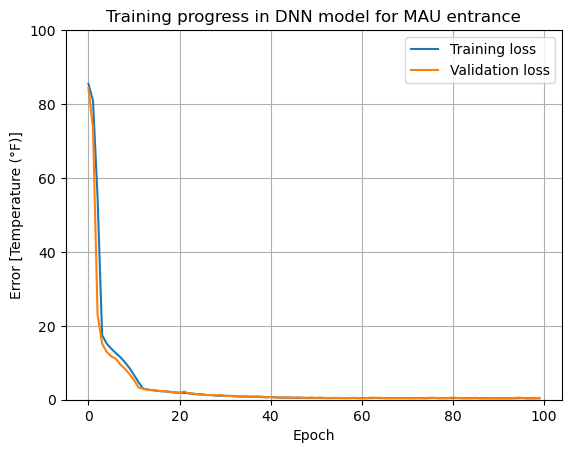

In [70]:
plot_loss(history_entrance)

In [71]:
def plot_loss(history_exit):
  plt.plot(history_exit.history['loss'], label='Training loss')
  plt.plot(history_exit.history['val_loss'], label='Validation loss')
  plt.ylim([0, 2])
  plt.xlim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Temperature (°F)]')
  plt.title('Training progress in DNN model for MAU exit')
  plt.legend()
  plt.grid(True)

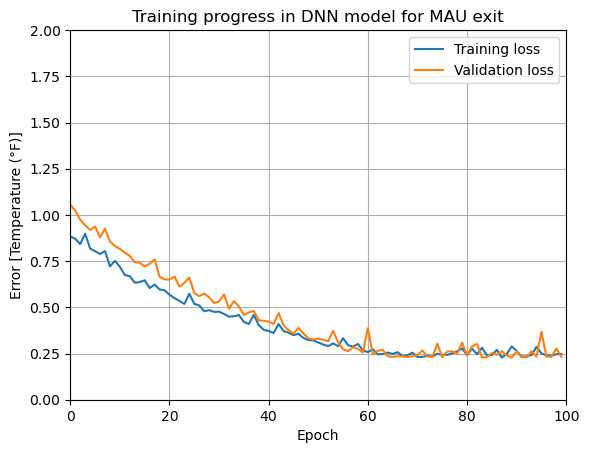

In [72]:

plot_loss(history_exit)

### Collect the results on the test set

#### MAU entrance

In [75]:
test_features_entrance = np.asarray(test_features_entrance).astype(np.float32)
test_features_entrance.shape

(340, 4)

In [76]:
test_results_entrance = {}
test_results_entrance['dnn_model'] = dnn_model.evaluate(test_features_entrance, test_labels_entrance, verbose=0)
test_results_entrance

{'dnn_model': 4.927254676818848}

In [77]:
#original
ori_test_features_entrance = np.asarray(ori_test_features_entrance).astype(np.float32)
ori_test_features_entrance.shape

(3, 4)

In [78]:
ori_test_results_entrance = {}
ori_test_results_entrance['dnn_model'] = dnn_model.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=0)
ori_test_results_entrance

{'dnn_model': 6.273030757904053}

#### MAU exit

In [80]:
test_features_exit = np.asarray(test_features_exit).astype(np.float32)

In [81]:
test_results_exit = {}
test_results_exit['dnn_model'] = dnn_model.evaluate(test_features_exit, test_labels_exit, verbose=0)
test_results_exit

{'dnn_model': 0.23160427808761597}

In [82]:
#original
ori_test_features_exit = np.asarray(ori_test_features_exit).astype(np.float32)
ori_test_features_exit.shape

(3, 4)

In [83]:
ori_test_results_exit = {}
ori_test_results_exit['dnn_model'] = dnn_model.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=0)
ori_test_results_exit

{'dnn_model': 0.10655975341796875}

## Performance

In [85]:
pd.DataFrame(test_results_entrance, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,4.927255


In [86]:
# original
pd.DataFrame(ori_test_results_entrance, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,6.273031


In [87]:
pd.DataFrame(test_results_exit, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,0.231604


In [88]:
#original
pd.DataFrame(ori_test_results_exit, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
dnn_model,0.10656


### Make predictions

In [90]:
test_predictions_entrance = dnn_model.predict(test_features_entrance).flatten()
test_predictions_entrance

11/11 [==============================] - 0s 335us/step


array([76.144, 77.7  , 81.915, 80.277, 76.267, 82.197, 78.81 , 85.697,
       82.108, 84.015, 77.306, 78.866, 84.704, 84.609, 73.015, 78.816,
       84.515, 85.79 , 77.369, 80.356, 84.047, 82.461, 81.612, 84.658,
       83.894, 82.48 , 85.458, 84.519, 83.824, 82.918, 75.946, 71.963,
       84.506, 82.821, 76.07 , 82.537, 82.1  , 81.993, 76.288, 82.302,
       82.077, 78.871, 84.527, 77.434, 83.106, 85.521, 83.029, 82.353,
       81.279, 78.783, 84.462, 73.007, 80.213, 82.344, 72.134, 76.234,
       82.464, 77.666, 84.562, 85.332, 84.691, 85.593, 84.345, 73.289,
       81.317, 82.165, 84.653, 85.554, 82.242, 80.238, 84.766, 80.421,
       72.125, 84.254, 77.443, 82.394, 72.044, 84.758, 76.153, 82.366,
       78.603, 84.466, 83.947, 82.359, 81.099, 82.129, 82.155, 84.782,
       73.511, 80.321, 85.612, 77.469, 80.586, 82.602, 82.859, 84.777,
       82.247, 72.992, 82.196, 78.778, 72.033, 84.455, 82.272, 82.907,
       78.586, 71.919, 84.631, 81.826, 76.322, 82.153, 82.152, 79.119,
      

In [91]:
# original
ori_test_predictions_entrance = dnn_model.predict(ori_test_features_entrance).flatten()
ori_test_predictions_entrance

1/1 [==============================] - 0s 7ms/step


array([73.135, 82.318, 82.233], dtype=float32)

In [92]:
test_predictions_exit = dnn_model.predict(test_features_exit).flatten()
test_predictions_exit

11/11 [==============================] - 0s 312us/step


array([74.188, 74.619, 74.607, 73.759, 74.258, 75.127, 75.36 , 75.351,
       74.66 , 75.301, 74.638, 75.373, 74.754, 75.212, 75.308, 75.453,
       74.768, 75.422, 74.993, 73.873, 75.182, 75.483, 74.772, 75.226,
       75.094, 75.167, 75.333, 74.742, 75.223, 75.057, 74.661, 75.08 ,
       75.071, 75.167, 74.126, 75.247, 74.925, 74.7  , 74.159, 75.15 ,
       75.142, 75.641, 75.211, 74.653, 75.259, 75.437, 75.066, 74.881,
       75.132, 75.647, 74.987, 75.056, 73.7  , 74.858, 75.09 , 74.235,
       75.141, 74.452, 74.873, 75.221, 74.663, 75.464, 74.684, 75.133,
       75.109, 75.054, 74.648, 75.322, 74.548, 73.775, 74.662, 73.992,
       74.98 , 74.79 , 74.754, 74.872, 74.92 , 74.817, 74.36 , 75.363,
       75.517, 75.032, 75.151, 75.189, 74.796, 74.569, 74.8  , 74.865,
       75.056, 73.565, 75.428, 74.456, 73.579, 75.442, 75.03 , 74.995,
       74.622, 75.043, 75.085, 75.256, 75.072, 75.211, 74.701, 75.301,
       75.464, 75.102, 75.132, 74.646, 74.394, 74.787, 74.967, 75.433,
      

In [93]:
# original
ori_test_predictions_exit = dnn_model.predict(ori_test_features_exit).flatten()
ori_test_predictions_exit

1/1 [==============================] - 0s 7ms/step


array([75.099, 74.957, 74.955], dtype=float32)

In [94]:
error_entrance = test_predictions_entrance - test_labels_entrance
error_entrance

11     -2.425682
23     -3.079515
24     -5.844732
25     -5.383389
28     -2.303353
          ...   
1660   -2.320549
1671   -2.530005
1674   -5.451672
1684   -2.809874
1694   -2.530953
Name: Temperature (Â°F), Length: 340, dtype: float64

In [95]:
# original
ori_error_entrance = ori_test_predictions_entrance - ori_test_labels_entrance
ori_error_entrance

5    -2.405402
12   -8.452381
15   -7.961303
Name: Temperature (°F), dtype: float64

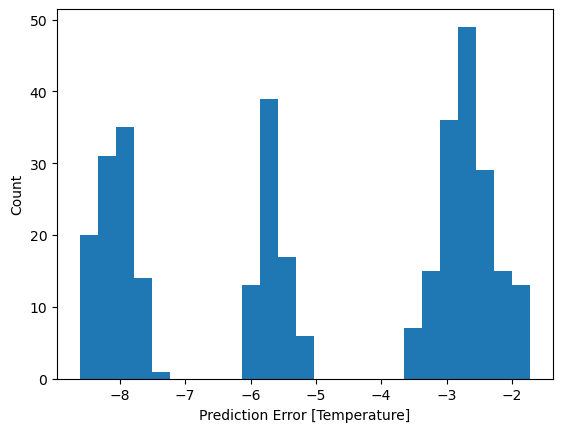

In [96]:
plt.hist(error_entrance, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

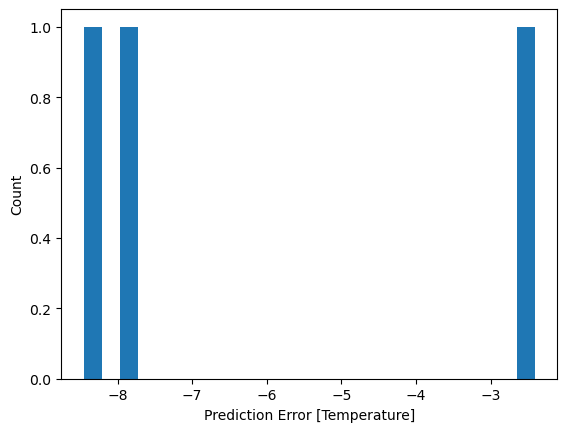

In [97]:
# original
plt.hist(ori_error_entrance, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

In [98]:
error_exit = test_predictions_exit - test_labels_exit
error_exit


11     -0.328180
23     -0.256936
24     -0.196670
25     -1.135409
28     -0.257669
          ...   
1660   -0.271043
1671    0.153329
1674   -1.202884
1684   -0.069205
1694   -0.341806
Name: Temperature (Â°F), Length: 340, dtype: float64

In [99]:
# original
ori_error_exit = ori_test_predictions_exit - ori_test_labels_exit
ori_error_exit

5    -0.010871
12   -0.117350
15   -0.191448
Name: Temperature (°F), dtype: float64

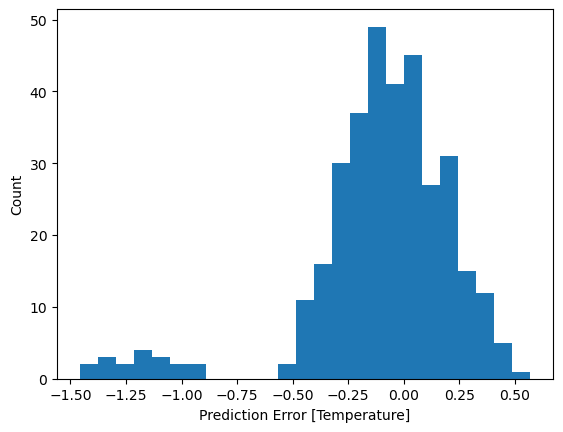

In [100]:
plt.hist(error_exit, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

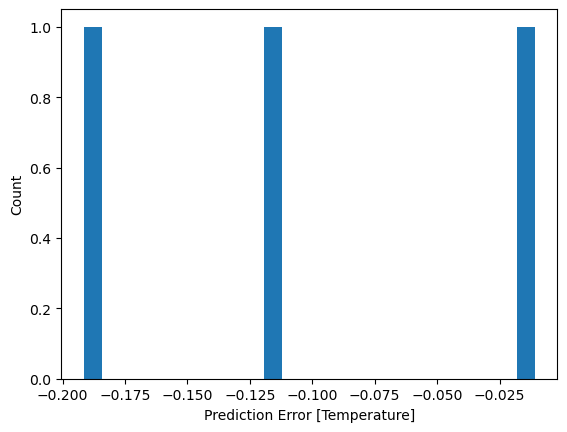

In [101]:
# original
plt.hist(ori_error_exit, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

#### Average error (AE)

AE: Provide a measure of bias

In [104]:
average_error_entrance = np.mean(error_entrance)
print("Average error:", average_error_entrance)

Average error: -4.927254446590648


In [105]:
# original
ori_average_error_entrance = np.mean(ori_error_entrance)
print("Average error:", ori_average_error_entrance)

Average error: -6.273028788248699


In [106]:
average_error_exit = np.mean(error_exit)
print("Average error:", average_error_exit)

Average error: -0.09636714872472413


In [107]:
# original
ori_average_error_exit = np.mean(ori_error_exit)
print("Average error:", ori_average_error_exit)

Average error: -0.10655659993489526


#### Mean squared error (MSE) and mean absolute error (MAE)

MSE: Penalize significant errors more heavily \
MAE: Provide a measure of the average magnitude of errors

In [110]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels_entrance, test_predictions_entrance)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_entrance, test_predictions_entrance)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 29.927871971627546
Mean Absolute Error: 4.927254446590648


In [111]:
# original
ori_mse = mean_squared_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mae = mean_absolute_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print("Mean Squared Error:", ori_mse)
print("Mean Absolute Error:", ori_mae)

Mean Squared Error: 46.87035061168937
Mean Absolute Error: 6.273028788248699


In [112]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels_exit, test_predictions_exit)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_exit, test_predictions_exit)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.11973011652916586
Mean Absolute Error: 0.23160438914579548


In [113]:
# original
ori_mse = mean_squared_error(ori_test_labels_exit, ori_test_predictions_exit)
ori_mae = mean_absolute_error(ori_test_labels_exit, ori_test_predictions_exit)
print("Mean Squared Error:", ori_mse)
print("Mean Absolute Error:", ori_mae)

Mean Squared Error: 0.016847237179058238
Mean Absolute Error: 0.10655659993489526


In [114]:
import numpy as np

def mean_absolute_percentage_error(y_actual, y_pred):
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape = mean_absolute_percentage_error(test_labels_entrance, test_predictions_entrance)
print(f'MAPE: {mape:.2f}%')

MAPE: 5.66%


In [115]:
# original
mape = mean_absolute_percentage_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print(f'MAPE: {mape:.2f}%')

MAPE: 7.11%


In [116]:
mape = mean_absolute_percentage_error(test_labels_exit, test_predictions_exit)
print(f'MAPE: {mape:.2f}%')

MAPE: 0.31%


In [117]:
mape = mean_absolute_percentage_error(ori_test_labels_exit, ori_test_predictions_exit)
print(f'MAPE: {mape:.2f}%')

MAPE: 0.14%


# Optuna

[I 2024-10-24 19:59:01,290] A new study created in memory with name: no-name-e54d593b-361c-4d04-96fc-705b3c0ef4d3
/var/folders/2z/b1lzf17n4z90pz80khfc42fw0000gp/T/ipykernel_6404/2147256317.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-10-24 19:59:08,181] Trial 0 finished with value: 0.5570507794618607 and parameters: {'num_layers': 5, 'num_neurons_layer_0': 92, 'num_neurons_layer_1': 48, 'num_neurons_layer_2': 68, 'num_neurons_layer_3': 100, 'num_neurons_layer_4': 24, 'learning_rate': 0.0008415547054936021, 'activation': 'relu'}. Best is trial 0 with value: 0.5570507794618607.
/var/folders/2z/b1lzf17n4z90pz80khfc42fw0000gp/T/ipykernel_6404/2147256317.py:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be re

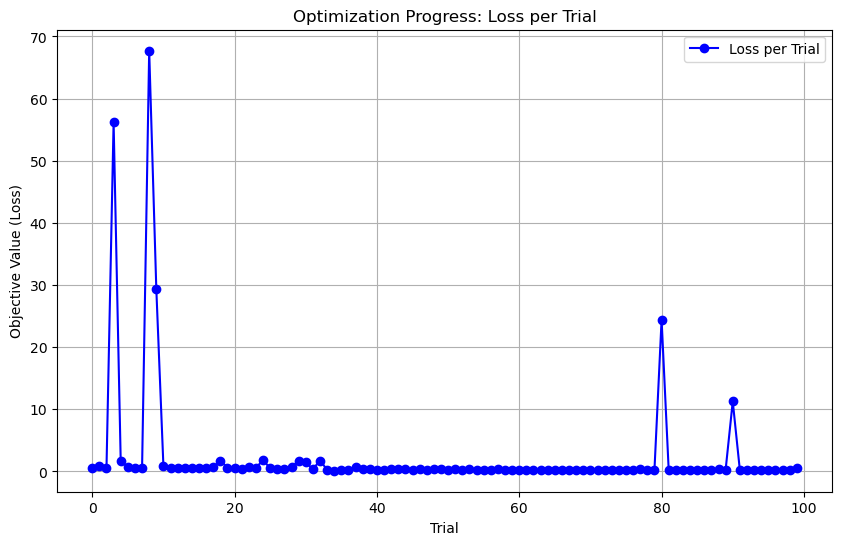

Best hyperparameters:  {'num_layers': 3, 'num_neurons_layer_0': 92, 'num_neurons_layer_1': 48, 'num_neurons_layer_2': 108, 'learning_rate': 0.002118820939893383, 'activation': 'tanh'}
Best trial loss:  0.10807193070650101
Epoch 1/50
43/43 [==============================] - 0s 520us/step - loss: 71.7693
Epoch 2/50
43/43 [==============================] - 0s 499us/step - loss: 58.2682
Epoch 3/50
43/43 [==============================] - 0s 528us/step - loss: 47.5584
Epoch 4/50
43/43 [==============================] - 0s 500us/step - loss: 37.1432
Epoch 5/50
43/43 [==============================] - 0s 531us/step - loss: 26.8650
Epoch 6/50
43/43 [==============================] - 0s 509us/step - loss: 16.6663
Epoch 7/50
43/43 [==============================] - 0s 519us/step - loss: 8.3043
Epoch 8/50
43/43 [==============================] - 0s 549us/step - loss: 4.4345
Epoch 9/50
43/43 [==============================] - 0s 527us/step - loss: 3.4899
Epoch 10/50
43/43 [========================

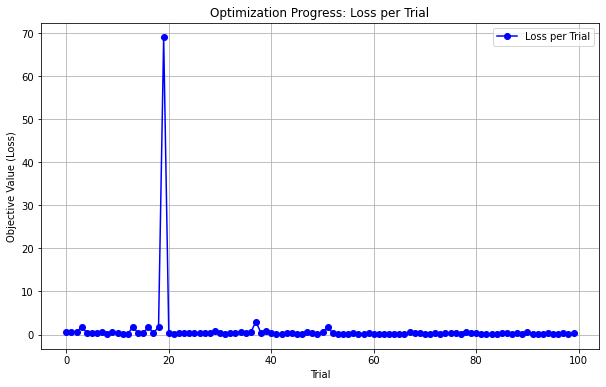

Best hyperparameters:  {'num_layers': 2, 'num_neurons_layer_0': 60, 'num_neurons_layer_1': 108, 'learning_rate': 0.0024793077544138947, 'activation': 'tanh'}
Best trial loss:  0.12486603856086731
Epoch 1/50
43/43 [==============================] - 0s 953us/step - loss: 71.1171
Epoch 2/50
43/43 [==============================] - 0s 976us/step - loss: 57.0624
Epoch 3/50
43/43 [==============================] - 0s 952us/step - loss: 44.8791
Epoch 4/50
43/43 [==============================] - 0s 929us/step - loss: 32.9002
Epoch 5/50
43/43 [==============================] - 0s 929us/step - loss: 21.0197
Epoch 6/50
43/43 [==============================] - 0s 952us/step - loss: 10.1189
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 4.7194
Epoch 8/50
43/43 [==============================] - 0s 976us/step - loss: 3.4884
Epoch 9/50
43/43 [==============================] - 0s 949us/step - loss: 3.4814
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss

In [119]:
import optuna
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

trial_losses = []

# Function to create a model with the given hyperparameters
# Function to create a model with a specific number of neurons in each layer
def create_model(input_shape, neurons_per_layer, activation, learning_rate):
    model = tf.keras.Sequential()
    
    # Add the first layer with input shape
    model.add(layers.Dense(neurons_per_layer[0], activation=activation, input_shape=(input_shape,)))
    
    # Add subsequent layers with specified number of neurons
    for neurons in neurons_per_layer[1:]:
        model.add(layers.Dense(neurons, activation=activation))
    
    model.add(layers.Dense(1))  # Output layer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='mean_absolute_error')
    return model

# Objective function to optimize both entrance and exit models
def objective(trial):
    # Suggest number of layers
    num_layers = trial.suggest_int('num_layers', 1, 5)
    
    # Suggest a different number of neurons for each layer
    neurons_per_layer = []
    for i in range(num_layers):
        neurons = trial.suggest_int(f'num_neurons_layer_{i}', 16, 128, step=4)  # Each layer can have 16 to 128 neurons
        neurons_per_layer.append(neurons)
    
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])

    # Create models for both entrance and exit
    model_entrance = create_model(train_features_entrance.shape[1], neurons_per_layer, activation, learning_rate)
    model_exit = create_model(train_features_exit.shape[1], neurons_per_layer, activation, learning_rate)

    # Split data into training and validation for both entrance and exit
    x_train_entrance, x_val_entrance, y_train_entrance, y_val_entrance = train_test_split(train_features_entrance, train_labels_entrance, test_size=0.2, random_state=42)
    x_train_exit, x_val_exit, y_train_exit, y_val_exit = train_test_split(train_features_exit, train_labels_exit, test_size=0.2, random_state=42)

    # Train both models
    model_entrance.fit(x_train_entrance, y_train_entrance, validation_data=(x_val_entrance, y_val_entrance), 
                       epochs=100, batch_size=32, verbose=0)
    model_exit.fit(x_train_exit, y_train_exit, validation_data=(x_val_exit, y_val_exit), 
                   epochs=100, batch_size=32, verbose=0)

    # Evaluate both models on validation data
    val_loss_entrance = model_entrance.evaluate(x_val_entrance, y_val_entrance, verbose=0)
    val_loss_exit = model_exit.evaluate(x_val_exit, y_val_exit, verbose=0)

    # Combine the two objectives by returning a weighted sum
    combined_loss = 0.5 * val_loss_entrance + 0.5 * val_loss_exit
    trial_losses.append(combined_loss)  # Append the loss to the list
    
    return combined_loss

# Create a study and optimize both models simultaneously
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(trial_losses, label='Loss per Trial', marker='o', color='blue')
plt.title('Optimization Progress: Loss per Trial')
plt.xlabel('Trial')
plt.ylabel('Objective Value (Loss)')
plt.legend()
plt.grid(True)
plt.show()

# Print best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best trial loss: ", study.best_value)

# Build the final optimized models
def build_best_model(best_params, input_shape):
    num_layers = best_params['num_layers']
    
    # Reconstruct neurons per layer using the best parameters
    neurons_per_layer = [best_params[f'num_neurons_layer_{i}'] for i in range(num_layers)]
    activation = best_params['activation']
    learning_rate = best_params['learning_rate']

    model = create_model(input_shape, neurons_per_layer, activation, learning_rate)
    return model

# Create the final models using the best hyperparameters
final_model_entrance = build_best_model(study.best_params, train_features_entrance.shape[1])
final_model_exit = build_best_model(study.best_params, train_features_exit.shape[1])


# Train the final models on the full datasets
final_model_entrance.fit(train_features_entrance, train_labels_entrance, epochs=50, batch_size=32, verbose=1)
final_model_exit.fit(train_features_exit, train_labels_exit, epochs=50, batch_size=32, verbose=1)


11/11 [==============================] - 0s 424us/step - loss: 0.4381
Test set loss for entrance: 0.4381049573421478
11/11 [==============================] - 0s 436us/step - loss: 0.1198
Test set loss for exit: 0.11984791606664658
1/1 [==============================] - 0s 9ms/step - loss: 0.2366
v2. Test set loss for entrance: 0.23655955493450165
1/1 [==============================] - 0s 10ms/step - loss: 0.1074
v2. Test set loss for exit: 0.1074269637465477
Test features Entrance: [[26.62   6.465 40.253  3.837]
 [22.35   5.745 40.173  4.886]
 [12.46   4.021 40.352  3.497]
 ...
 [14.32   4.371 39.764  3.757]
 [20.51   6.468 45.508  5.585]
 [26.62   6.456 40.173  3.851]]

v2. Test features Entrance: [[29.08  6.44 38.33  5.46]
 [ 7.    2.42 38.36  2.1 ]
 [ 7.64  2.76 38.77  2.32]]

Test result Entrance: {'dnn_model': 0.4381049573421478}

v2. Test result Entrance: {'dnn_model': 0.23655955493450165}

Test features Exit: [[38.64   8.33  41.75   7.113]
 [38.19   8.285 41.957  7.091]
 [38.61 

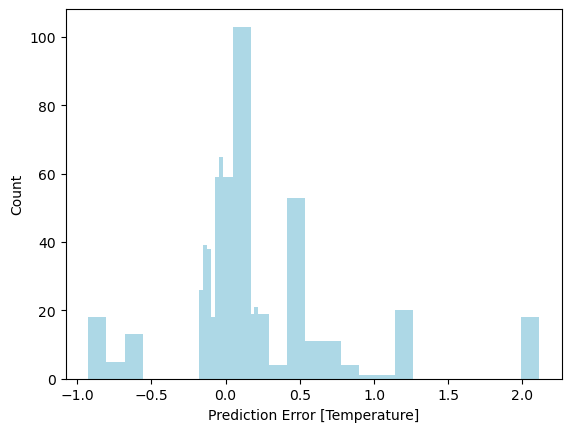

In [120]:

# Optionally, evaluate on a test set (if you have one)
test_loss_entrance = final_model_entrance.evaluate(test_features_entrance, test_labels_entrance, verbose=1)
print(f"Test set loss for entrance: {test_loss_entrance}")
test_loss_exit = final_model_exit.evaluate(test_features_exit, test_labels_exit, verbose=1)
print(f"Test set loss for exit: {test_loss_exit}")

ori_test_loss_entrance = final_model_entrance.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=1)
print(f"v2. Test set loss for entrance: {ori_test_loss_entrance}")
ori_test_loss_exit = final_model_exit.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=1)
print(f"v2. Test set loss for exit: {ori_test_loss_exit}")

#----------------------
test_features_entrance = np.asarray(test_features_entrance).astype(np.float32)
print("Test features Entrance:", test_features_entrance)
print()

ori_test_features_entrance = np.asarray(ori_test_features_entrance).astype(np.float32)
print("v2. Test features Entrance:", ori_test_features_entrance)
print()

#----------------------
test_results_entrance = {}
test_results_entrance['dnn_model'] = final_model_entrance.evaluate(test_features_entrance, test_labels_entrance, verbose=0)
print("Test result Entrance:", test_results_entrance)
print()

ori_test_results_entrance = {}
ori_test_results_entrance['dnn_model'] = final_model_entrance.evaluate(ori_test_features_entrance, ori_test_labels_entrance, verbose=0)
print("v2. Test result Entrance:", ori_test_results_entrance)
print()

#----------------------
test_features_exit = np.asarray(test_features_exit).astype(np.float32)
print("Test features Exit:", test_features_exit)
print()

ori_test_features_exit = np.asarray(ori_test_features_exit).astype(np.float32)
print("v2. Test features Exit:", ori_test_features_exit)

#----------------------
test_results_exit = {}
test_results_exit['dnn_model'] = final_model_exit.evaluate(test_features_exit, test_labels_exit, verbose=0)
print("Test result Exit:", test_results_exit)
print()

ori_test_results_exit = {}
ori_test_results_exit['dnn_model'] = final_model_exit.evaluate(ori_test_features_exit, ori_test_labels_exit, verbose=0)
print("v2. Test result Exit:", ori_test_results_exit)
print()

#----------------------
pd.DataFrame(test_results_entrance, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(test_results_exit, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(ori_test_results_entrance, index=['Mean absolute error [Temperature]']).T

pd.DataFrame(ori_test_results_exit, index=['Mean absolute error [Temperature]']).T

#----------------------
test_predictions_entrance = final_model_entrance.predict(test_features_entrance).flatten()
print("Test Predictions Entrance:", test_predictions_entrance)
print()

test_predictions_exit = final_model_exit.predict(test_features_exit).flatten()
print("Test Predictions Exit:", test_predictions_exit)
print()

ori_test_predictions_entrance = final_model_entrance.predict(ori_test_features_entrance).flatten()
print("v2. Test Predictions Entrance:", ori_test_predictions_entrance)
print()

ori_test_predictions_exit = final_model_exit.predict(ori_test_features_exit).flatten()
print("v2. Test Predictions Exit:", ori_test_predictions_exit)
print()

#----------------------
error_entrance = test_predictions_entrance - test_labels_entrance
print("Error entrance:", error_entrance)
print()

error_exit = test_predictions_entrance - test_labels_entrance
print("Error exit:", error_exit)
print()

ori_error_entrance = ori_test_predictions_entrance - ori_test_labels_entrance
print("v2. Error entrance:", ori_error_entrance)
print()

ori_error_exit = ori_test_predictions_entrance - ori_test_labels_entrance
print("v2. Error exit:", ori_error_exit)
print()

#----------------------
plt.hist(error_entrance, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

error_exit = test_predictions_exit - test_labels_exit
error_exit

plt.hist(error_exit, bins=25, color='lightblue')
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

# average error
average_error_entrance = np.mean(error_entrance)
print("Average error for entrance:", average_error_entrance)
print()

average_error_exit = np.mean(error_exit)
print("Average error for exit:", average_error_exit)
print()

ori_average_error_entrance = np.mean(ori_error_entrance)
print("v2. Average error for entrance:", ori_average_error_entrance)
print()

ori_average_error_exit = np.mean(ori_error_exit)
print("v2. Average error for exit:", ori_average_error_exit)
print()

# mean squared error
from sklearn.metrics import mean_squared_error
mse_entrance = mean_squared_error(test_labels_entrance, test_predictions_entrance)
mse_exit = mean_squared_error(test_labels_exit, test_predictions_exit)
print("Mean Squared Error for entrance:", mse_entrance)
print("Mean Squared Error for exit:", mse_exit)
print()

from sklearn.metrics import mean_squared_error
ori_mse_entrance = mean_squared_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mse_exit = mean_squared_error(ori_test_labels_exit, ori_test_predictions_exit)
print("v2. Mean Squared Error for entrance:", ori_mse_entrance)
print("v2. Mean Squared Error for exit:", ori_mse_exit)
print()

# mean absolute error
from sklearn.metrics import mean_absolute_error
mae_entrance = mean_absolute_error(test_labels_entrance, test_predictions_entrance)
mae_exit = mean_absolute_error(test_labels_exit, test_predictions_exit)
print("Mean Absolute Error for entrance:", mae_entrance)
print("Mean Absolute Error for exit:", mae_exit)
print()


from sklearn.metrics import mean_absolute_error
ori_mae_entrance = mean_absolute_error(ori_test_labels_entrance, ori_test_predictions_entrance)
ori_mae_exit = mean_absolute_error(ori_test_labels_exit, ori_test_predictions_exit)
print("v2. Mean Absolute Error for entrance:", ori_mae_entrance)
print("v2. Mean Absolute Error for exit:", ori_mae_exit)
print()


import numpy as np

def mean_absolute_percentage_error(y_actual, y_pred):
    y_actual, y_pred = np.array(y_actual), np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape_entrance = mean_absolute_percentage_error(test_labels_entrance, test_predictions_entrance)
print(f'MAPE for entrance: {mape_entrance:.2f}%')

mape_exit = mean_absolute_percentage_error(test_labels_exit, test_predictions_exit)
print(f'MAPE for exit: {mape_exit:.2f}%')

ori_mape_entrance = mean_absolute_percentage_error(ori_test_labels_entrance, ori_test_predictions_entrance)
print(f'v2. MAPE for entrance: {ori_mape_entrance:.2f}%')

ori_mape_exit = mean_absolute_percentage_error(ori_test_labels_exit, ori_test_predictions_exit)
print(f'v2. MAPE for exit: {ori_mape_exit:.2f}%')


In [121]:
print("Trial Losses (Objective Values) as a Column:")
for i, loss in enumerate(trial_losses):
    print(f"{i + 1}|{loss}")

Trial Losses (Objective Values) as a Column:
1|0.5570507794618607
2|0.7986577600240707
3|0.5595938861370087
4|56.18984031677246
5|1.5932369232177734
6|0.7583253681659698
7|0.6016537845134735
8|0.5303560048341751
9|67.7089786529541
10|29.388821601867676
11|0.8223410546779633
12|0.5006768703460693
13|0.49343812465667725
14|0.4918321967124939
15|0.5865670740604401
16|0.5388591587543488
17|0.603728324174881
18|0.6585977971553802
19|1.7397026233375072
20|0.6233415007591248
21|0.5443441569805145
22|0.4135911464691162
23|0.6608028560876846
24|0.5593795329332352
25|1.847203254699707
26|0.47387704253196716
27|0.36335501074790955
28|0.43111634254455566
29|0.6501554250717163
30|1.7428291253745556
31|1.4525761678814888
32|0.3679780922830105
33|1.7399519197642803
34|0.28102970495820045
35|0.10807193070650101
36|0.2786802798509598
37|0.22688952460885048
38|0.7631734199821949
39|0.30578405037522316
40|0.41914601996541023
41|0.26186301186680794
42|0.2928758077323437
43|0.3209781385958195
44|0.46082829